# Tutorial 03: Classification I

In this notebook, we perform classification of Robot movements in an environment with walls using real dataset. 

Install the necessary libraries in the PC or in the Virtual Environment using provided Requirements.txt.

## Import Important Libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functions.fisher_score import fisher_index_calc
from sklearn.metrics import accuracy_score, make_scorer
from functions.plot_confusion_matrix import plot_confusion_matrix
import math, random

## Task 1: Data Preprocessing

Load the given data in the 'Data' folder and analyse the data and solve the following questions.

1. What is the sample size ?
2. Is data labeled? If yes print the labeles of the data.
3. Check the features and type of data. 
4. Plot the data distribution of Features towards labels.

In [28]:
# Load the data from csv to Pandas Dataframe

data = np.loadtxt("Data/sensor_readings_24.csv", delimiter=',', dtype=str)

df = pd.DataFrame(data[:,:24], dtype=np.float64)
df = pd.concat([df, pd.DataFrame(data[:, 24], columns=['Label'])], axis=1)

In [29]:
# verify the data by printing the sample data and its shape
print("Size of the Data:", df.shape)
print ("Sample Data:\n", df.head(n=10))
df.iloc[:, 0:24]
df['Label']

Size of the Data: (5456, 25)
Sample Data:
        0      1      2      3    4      5      6      7      8      9  ...  \
0  0.438  0.498  3.625  3.645  5.0  2.918  5.000  2.351  2.332  2.643  ...   
1  0.438  0.498  3.625  3.648  5.0  2.918  5.000  2.637  2.332  2.649  ...   
2  0.438  0.498  3.625  3.629  5.0  2.918  5.000  2.637  2.334  2.643  ...   
3  0.437  0.501  3.625  3.626  5.0  2.918  5.000  2.353  2.334  2.642  ...   
4  0.438  0.498  3.626  3.629  5.0  2.918  5.000  2.640  2.334  2.639  ...   
5  0.439  0.498  3.626  3.629  5.0  2.918  5.000  2.633  2.334  2.645  ...   
6  0.440  5.000  3.627  3.628  5.0  2.919  3.028  2.346  2.330  2.638  ...   
7  0.444  5.021  3.631  3.634  5.0  2.919  5.000  2.626  2.327  2.638  ...   
8  0.451  5.025  3.635  3.639  5.0  2.920  3.027  2.620  2.323  2.632  ...   
9  0.458  5.022  3.640  3.644  5.0  2.922  5.000  2.346  2.321  2.628  ...   

      15     16     17     18     19     20     21     22     23  \
0  0.593  0.502  0.493  0.504 

0       Slight-Right-Turn
1       Slight-Right-Turn
2       Slight-Right-Turn
3       Slight-Right-Turn
4       Slight-Right-Turn
              ...        
5451         Move-Forward
5452     Sharp-Right-Turn
5453     Sharp-Right-Turn
5454         Move-Forward
5455     Sharp-Right-Turn
Name: Label, Length: 5456, dtype: object

### Verify the data distribution and check for the following.

1. Is normalization required ?
2. What do you observe from the data about data distribution and asses if data is balanced?
3. What do you think that is needed further by analysing the data ? 

In [30]:
# Tabulate the sample data set using describe function and analyse. 
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.471617,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,...,2.205772,1.202111,0.989831,0.910273,1.05811,1.076320,1.015923,1.778034,1.555045,1.578508
std,0.802801,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,...,1.715435,1.098568,0.942075,0.889527,1.14463,1.141498,0.887439,1.571686,1.291447,1.150480
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.34000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,...,0.860000,0.690000,0.581000,0.529750,0.52300,0.541750,0.567000,0.743000,0.792000,0.884000
50%,1.335000,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,...,1.328500,0.803000,0.738000,0.685000,0.69100,0.693000,0.764000,1.030500,1.071000,1.289000
75%,1.814000,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,...,4.436250,1.159000,0.913000,0.837000,0.85700,0.863000,1.002250,2.068250,1.559500,1.657250
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [31]:
df.groupby(['Label']).count()[0]

Label
Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Left-Turn      328
Slight-Right-Turn     826
Name: 0, dtype: int64

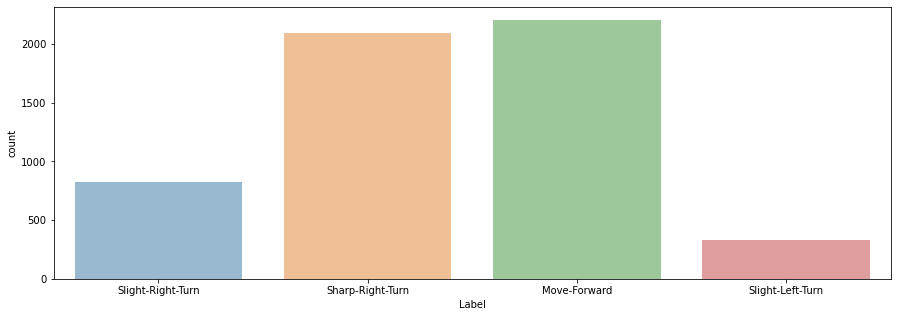

In [32]:
# Plot the data distribution using SNS countplot

fig = plt.figure(figsize=(15,5))
axis = sns.countplot(x='Label',data=df,alpha=0.5)

# Task 2: Feature Selection

## Little bit of Theory about  Feature Selection
Different types of Feature Selection methods:  
<img src="figures/feature_selection_methods.png">  
Source: Medium.com

#### Correlation Statistics  
The scikit-learn library provides an implementation of most of the useful statistical measures.  
For example:  
1. Pearson’s Correlation Coefficient: f_regression()  
2. ANOVA: f_classif()  
3. Chi-Squared: chi2()  
4. Mutual Information: mutual_info_classif() and mutual_info_regression()  
Also, the SciPy library provides an implementation of many more statistics, such as Kendall’s tau (kendalltau) and Spearman’s rank correlation (spearmanr).
#### Selection Method
The scikit-learn library also provides many different filtering methods once statistics have been calculated for each input variable with the target.
Two of the more popular methods include:
1. Select the top k variables: SelectKBest
2. Select the top percentile variables: SelectPercentile

### Answer the following: 
1. What type of feature selection methods that are applicable for the given dataset? 
2. What do you think about the data size and how it influence the learning?
3. Do we need large data to train the models for better results? 
4. What do you mean by large data ? Large no. of samples Vs More features ?

In [33]:
# Simplr way of feature selection.
# Apply the suitable feature selection method from above description and extract the data.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset

# define feature selection
fs = SelectKBest(score_func=f_classif, k=3)
# apply feature selection
df_selected_1 = fs.fit_transform(df.iloc[:, 0:24], df['Label'])
print(df_selected_1.shape)

(5456, 3)


<Figure size 1656x720 with 0 Axes>

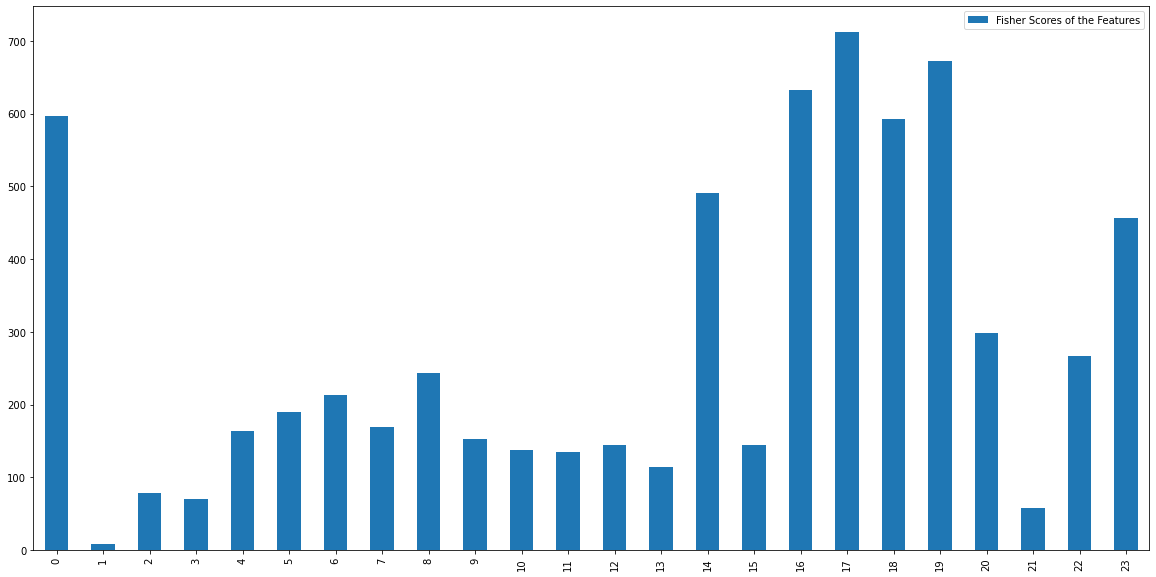

In [34]:
# Similarity Based Feature Selection using Fisher Score 

training_set = df.iloc[:, :(df.shape[1]-1)].values
label_set = df.iloc[:, (df.shape[1]-1):].values

# Get the fisher scores
fisher_scores = fisher_index_calc(training_set, label_set)

# Plot the fisher scores
fig= plt.figure(figsize=(23, 10))
df_fisher = pd.DataFrame({'Fisher Scores of the Features': fisher_scores})
ax = df_fisher.plot.bar(figsize=(20,10))
plt.show()

### What do you infer from the above plot ?

In [35]:
# Perform feature selection by analysing the above plot
# Remove the features that are not significant according to your analysis.

to_remove = []
for i in range((len(fisher_scores))):
    if fisher_scores[i] < 600:
        # we mark for removal
        to_remove.append(i)

df_selected_2 = np.delete(training_set, to_remove, 1)
df_selected_2.shape

(5456, 3)

# Task 3: Model Learning for Classification

Data Preperation for Learning

In [36]:
# Test and Train data splitting
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


labelEn = LabelEncoder()
encoded_labels = labelEn.fit_transform(df['Label'])
class_names = labelEn.classes_

X_train, X_test, y_train, y_test = train_test_split(df_selected_2, encoded_labels, test_size=0.3, shuffle=False)


## KNN Classifier

### Implementat your own KNN Classifier

In [37]:
# Implement KNN classifier with euclideab Distance
def mode(list):
    return max(set(list), key=list.count)
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(mode, neighbors))

In [38]:
model = KNeighborsClassifier(k=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

<AxesSubplot:title={'center':'Confusion matrix For KNN Classification'}, xlabel='Predicted label', ylabel='True label'>

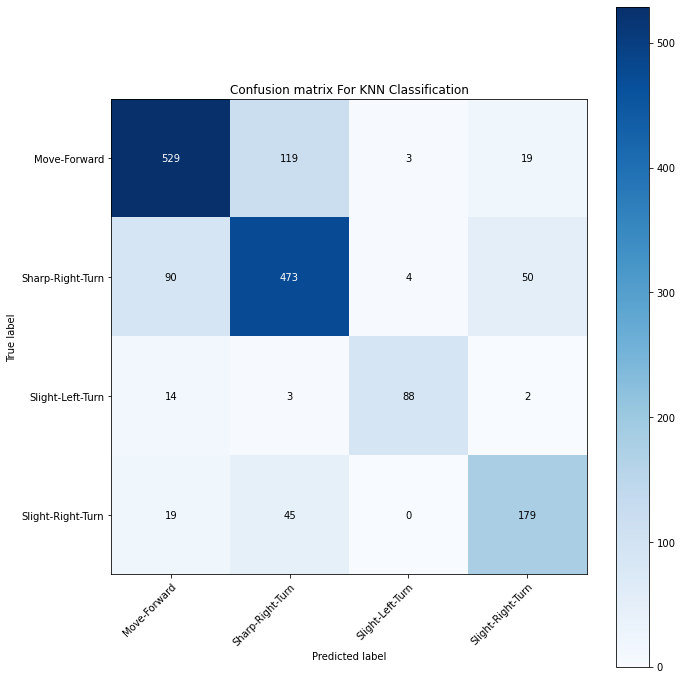

In [39]:
# Plot The confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix For KNN Classification')

In [40]:
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Performance - 77.5198533903482%


## Answer the following
1. Can we choose any value for K ?
2. What will happen if we keep on increasing K ?

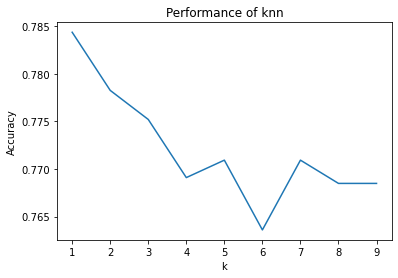

In [41]:
# Comparision of accuracy with different K value.
ks = range(1, 10)
accuracies = [] 
for k in ks:
    model = KNeighborsClassifier(k=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(accuracy)


# Accuracy vs. K
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

### Bonus

Implement for other distances and compare the results

### Implementation Using standard library

Implement using Sklearn standard library and compare the results

In [42]:
# Import Libraries and define Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

<AxesSubplot:title={'center':'Confusion matrix For KNN Classification'}, xlabel='Predicted label', ylabel='True label'>

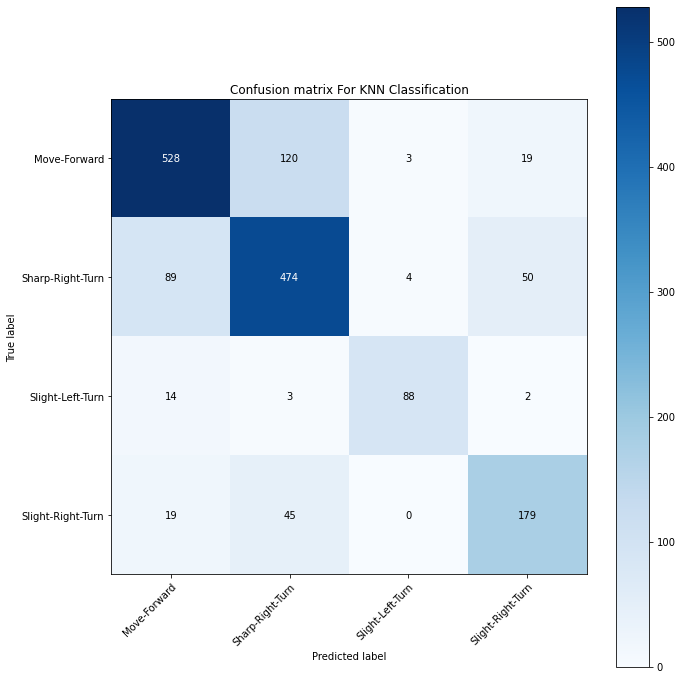

In [43]:
# Plot The confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix For KNN Classification')

In [44]:
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Performance - 77.5198533903482%


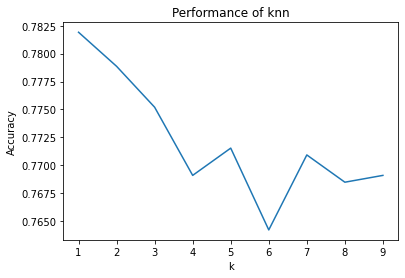

In [45]:
# Comparision of accuracy with different K value.
ks = range(1, 10)
accuracies = [] 
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(accuracy)


# Accuracy vs. K
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

### Bonus

## Decision Tree Classifier

### Answer the Following
What is Deceision Tree and how do you implement it?   
What is entropy in Decision Tree ?  
What is information gain in Decision Tree ?  

### Implement your own Decision Tree Classifier

In [46]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [47]:
# Import Libraries and define Model
model = DecisionTree(max_depth=5)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

<AxesSubplot:title={'center':'Confusion matrix For Naive Bayes Classifier'}, xlabel='Predicted label', ylabel='True label'>

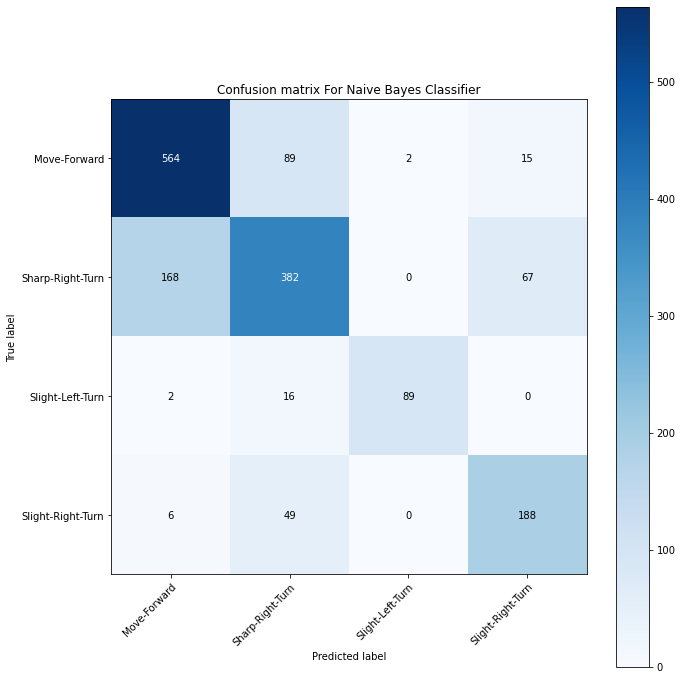

In [48]:
# Plot The confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix For Naive Bayes Classifier')

In [49]:
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Performance - 74.70983506414173%


### Implementation Using standard library

Implement using Sklearn standard library and compare the results

In [50]:
# Import Libraries and define Model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

<AxesSubplot:title={'center':'Confusion matrix For Naive Bayes Classifier'}, xlabel='Predicted label', ylabel='True label'>

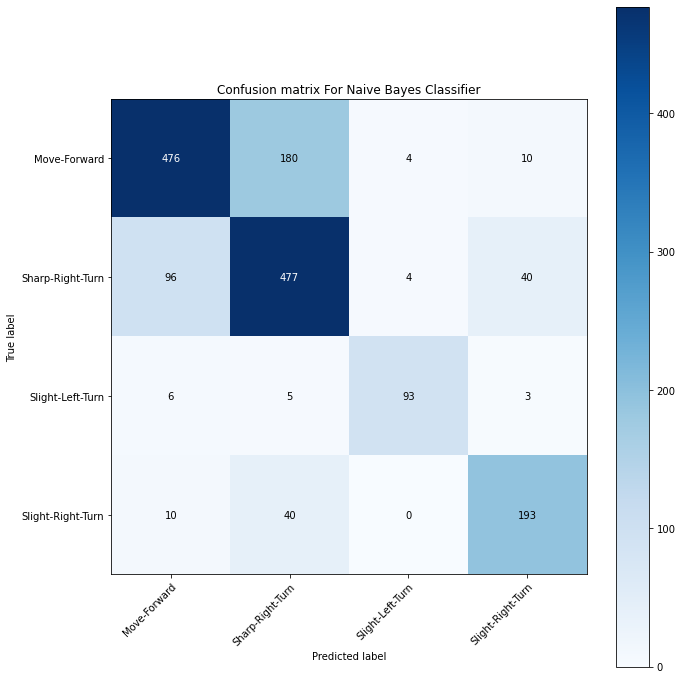

In [51]:
# Plot The confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix For Naive Bayes Classifier')

In [52]:
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Performance - 75.68723274282225%
